In [1]:
 # Install necessary packages (Uncomment if not installed)
!pip install xgboost scikit-learn pandas matplotlib seaborn

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/Chennai houseing sale.csv")

In [4]:
# Display first few rows
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
# Data Preprocessing
# Drop columns with excessive missing values (>30% missing)
missing_cols = df.columns[df.isnull().mean() > 0.3]
df.drop(columns=missing_cols, inplace=True)

In [6]:
# Fill missing values with median (for numerical) or mode (for categorical)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-6-9aa88950aa9e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-6-9aa88950aa9e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]):
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [8]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Select features and target variable
X = df.drop(columns=["SALES_PRICE"])
y = df["SALES_PRICE"]

In [10]:
# Count total missing values in the dataset
print("Total missing values in the dataset:", df.isnull().sum().sum())

Total missing values in the dataset: 0


In [11]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train multiple models and compare performance
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf"),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [14]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [15]:
import pandas as pd # Add this line at the beginning of your script or cell

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                                    MAE           MSE          RMSE  R2 Score
Linear Regression          1.017962e+06  1.646886e+12  1.283311e+06  0.835722
Ridge Regression           1.017966e+06  1.646942e+12  1.283332e+06  0.835716
Lasso Regression           1.017962e+06  1.646886e+12  1.283311e+06  0.835722
Random Forest              5.368036e+05  4.544310e+11  6.741150e+05  0.954670
Support Vector Regression  2.557296e+06  1.020091e+13  3.193887e+06 -0.017550
XGBoost                    3.530876e+05  2.150191e+11  4.637015e+05  0.978552


In [16]:
xgb_params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

In [17]:
grid_search = GridSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42),
    xgb_params,
    cv=3,
    scoring="r2",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [18]:
# Get the best XGBoost model after hyperparameter tuning
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("Best XGBoost Model Performance:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Best XGBoost Model Performance:
R2 Score: 0.9904530644416809
RMSE: 309366.56005457346


In [19]:
# Final Evaluation
print("Best XGBoost Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

Best XGBoost Model Performance:
MAE: 234891.40625
MSE: 95707668480.0
RMSE: 309366.56005457346
R2 Score: 0.9904530644416809


Correlation Matrix:
                 PRT_ID      AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  \
PRT_ID         1.000000  0.034100  0.083927  -0.015758      -0.017099   
AREA           0.034100  1.000000  0.272760   0.005830      -0.015554   
INT_SQFT       0.083927  0.272760  1.000000  -0.000784      -0.002995   
DATE_SALE     -0.015758  0.005830 -0.000784   1.000000       0.012698   
DIST_MAINROAD -0.017099 -0.015554 -0.002995   0.012698       1.000000   
N_BEDROOM      0.150850  0.352588  0.650541  -0.021666      -0.012919   
N_BATHROOM          NaN       NaN       NaN        NaN            NaN   
N_ROOM         0.051637  0.175242  0.928501  -0.003343      -0.005066   
SALE_COND     -0.015617 -0.004530  0.003518   0.008575       0.004008   
PARK_FACIL     0.004679  0.000458 -0.001666  -0.014872      -0.013102   
DATE_BUILD     0.005005 -0.009101  0.022064   0.107720      -0.010319   
BUILDTYPE     -0.034276 -0.006388  0.079487  -0.010270      -0.016701   
UTILITY_AVAIL -0.038883  0.0045

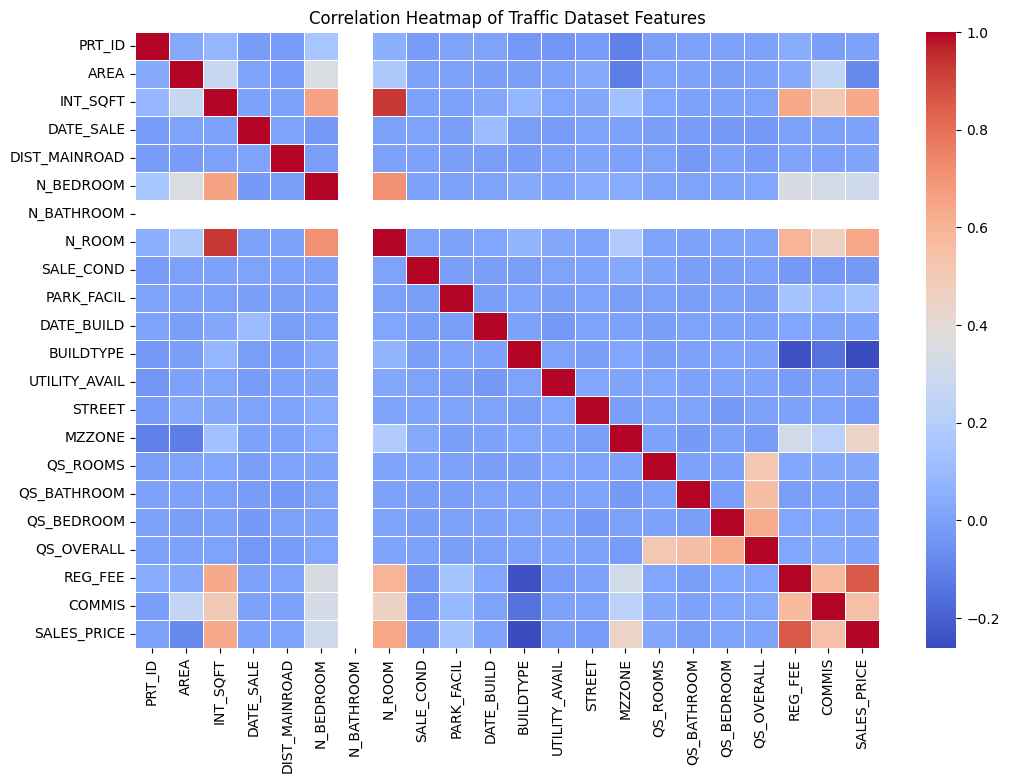

In [20]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select only numeric columns from the DataFrame 'df'
numeric_df = df.select_dtypes(include=np.number)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5, annot=False)
plt.title("Correlation Heatmap of Traffic Dataset Features")
plt.show()

<ipython-input-21-a286efaefaf3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='Blues_d')


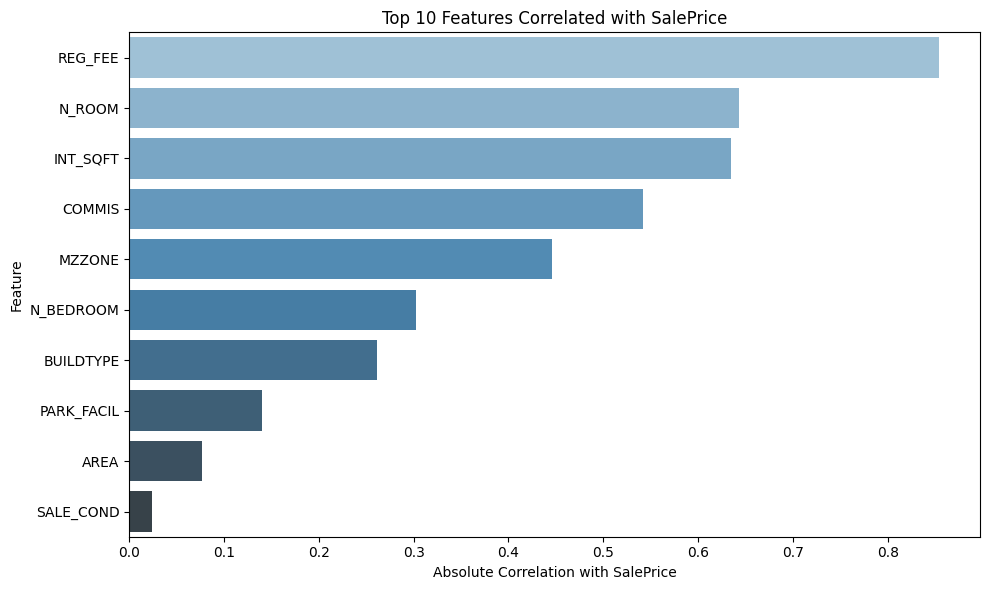

In [21]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation of all features with 'SalePrice'
corr_with_saleprice = numeric_df.corr()['SALES_PRICE'].drop('SALES_PRICE')

# Get top 10 features with highest absolute correlation
top_10_corr = corr_with_saleprice.abs().sort_values(ascending=False).head(10)

# Plotting the top 10 correlated features with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette='Blues_d')
plt.title('Top 10 Features Correlated with SalePrice')
plt.xlabel('Absolute Correlation with SalePrice')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

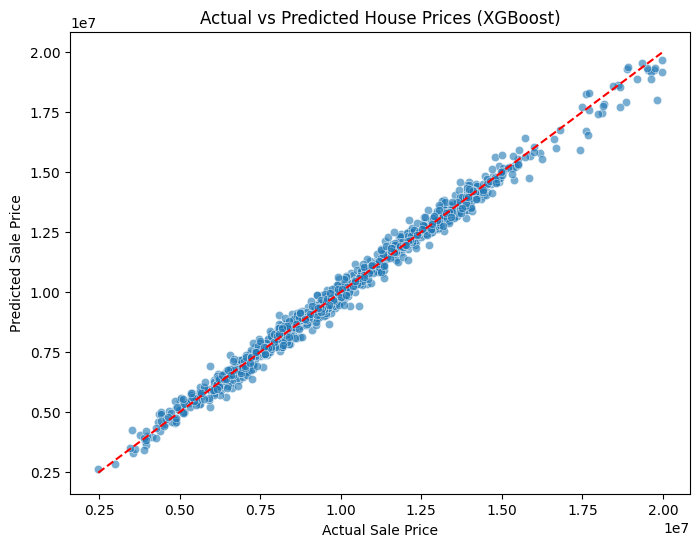

In [22]:
# Scatter plot for predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices (XGBoost)")
plt.show()

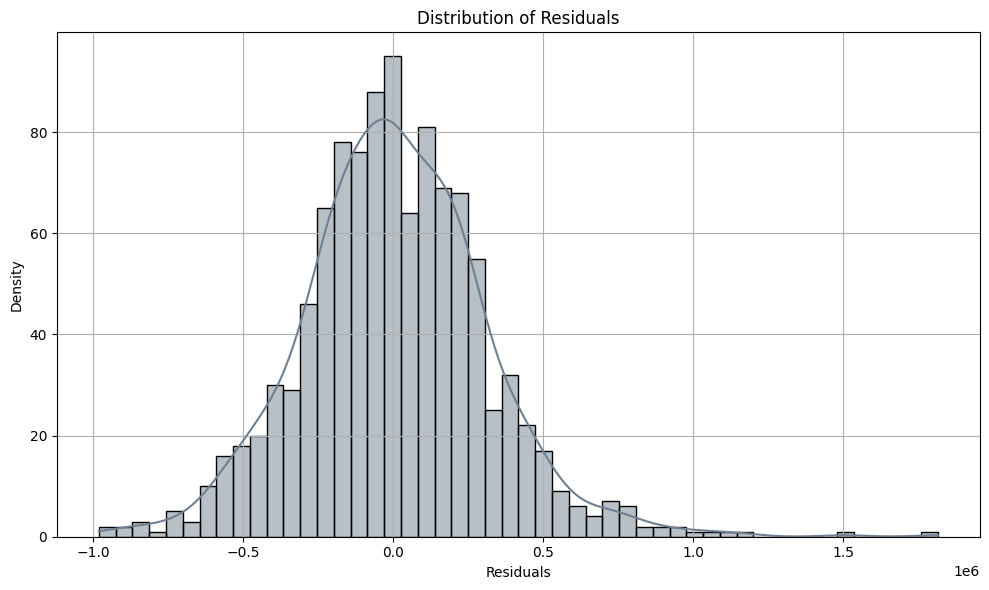

In [23]:
# Calculate residuals
residuals = y_test - y_pred_xgb

# Plot histogram with KDE curve of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='slategray')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

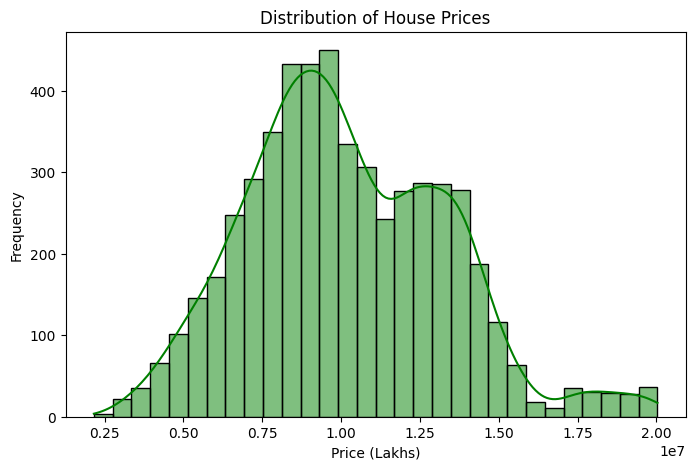

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SALES_PRICE'], bins=30, kde=True, color='green') # Changed 'price' to 'SALES_PRICE'
plt.title('Distribution of House Prices')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-bf10f4edf2cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette="viridis")


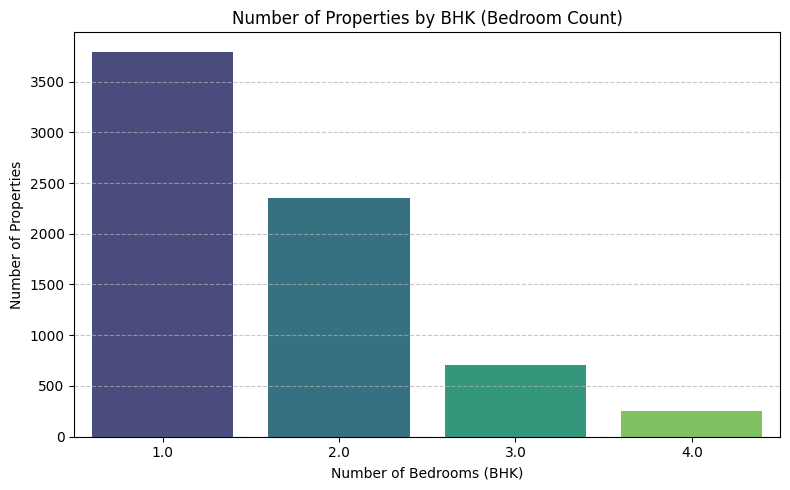

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported


df = pd.read_csv("/Chennai houseing sale.csv") # Load your data into a DataFrame named 'df'


bhk_counts = df['N_BEDROOM'].value_counts() # Calculate BHK counts


plt.figure(figsize=(8,5))
sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette="viridis")
plt.title("Number of Properties by BHK (Bedroom Count)")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Number of Properties")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

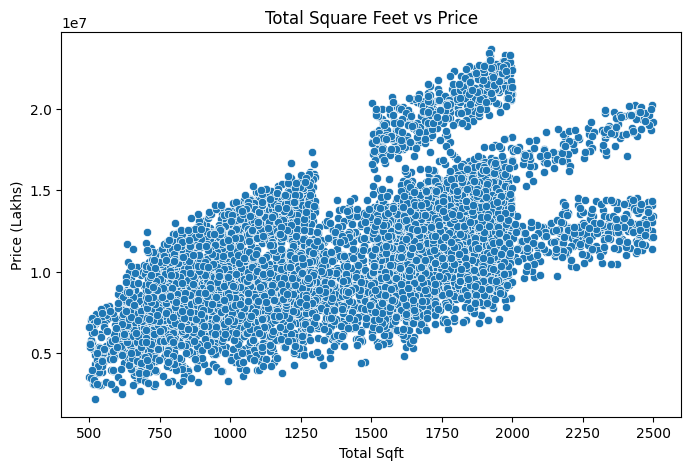

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='INT_SQFT', y='SALES_PRICE') # Changed 'total_sqft' to 'INT_SQFT' and 'price' to 'SALES_PRICE'
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price (Lakhs)')
plt.show()

<ipython-input-27-1b45e31ec013>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=area_counts.index, x=area_counts.values, palette="mako")


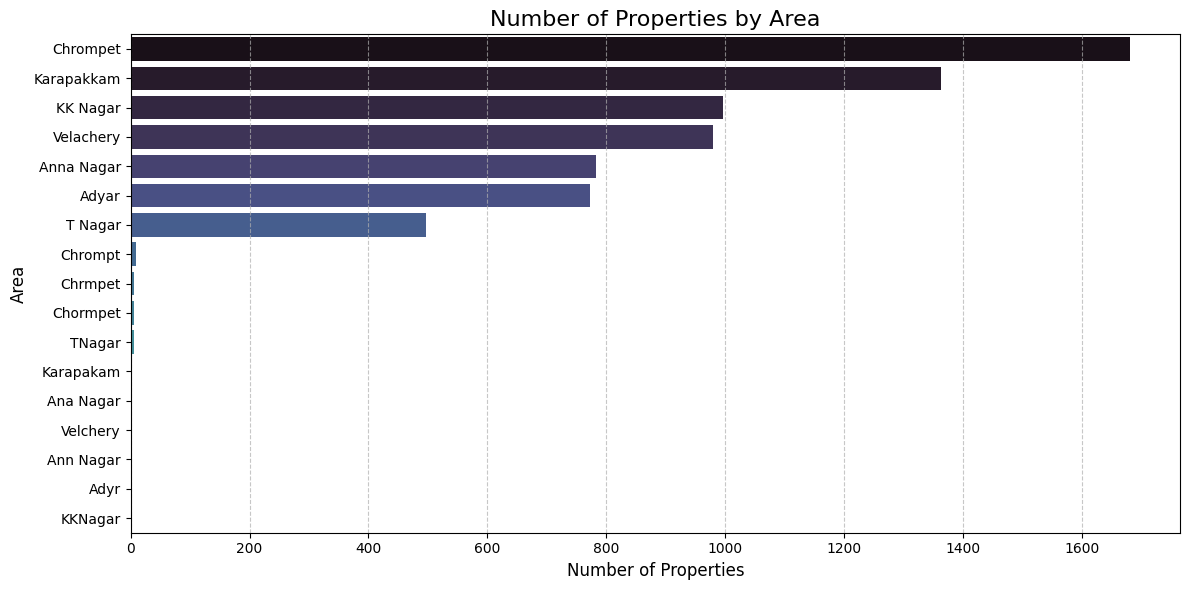

In [27]:
# Step 1: Count number of properties in each AREA
area_counts = df['AREA'].value_counts().sort_values(ascending=False)

# Step 2: Plot AREA vs Number of Properties
plt.figure(figsize=(12,6))
sns.barplot(y=area_counts.index, x=area_counts.values, palette="mako")
plt.title("Number of Properties by Area", fontsize=16)
plt.xlabel("Number of Properties", fontsize=12)
plt.ylabel("Area", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-28-2f05fdf5a5ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bhk_bath['N_BEDROOM'] = df_bhk_bath['N_BEDROOM'].astype(int)
<ipython-input-28-2f05fdf5a5ca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='N_BEDROOM', y='N_BATHROOM', data=avg_bathrooms, palette="coolwarm")


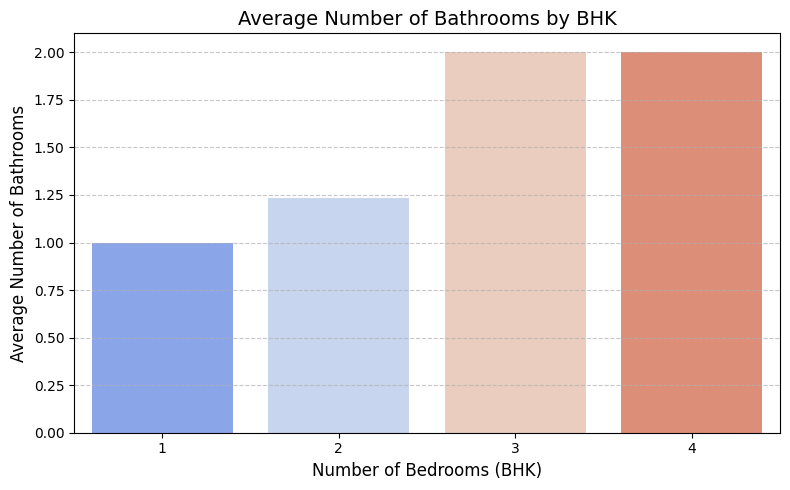

In [28]:
# Step 1: Drop missing values in bedroom and bathroom columns
df_bhk_bath = df.dropna(subset=['N_BEDROOM', 'N_BATHROOM'])

# Step 2: Convert BHK to integer (from float like 2.0)
df_bhk_bath['N_BEDROOM'] = df_bhk_bath['N_BEDROOM'].astype(int)

# Step 3: Group by BHK and compute average number of bathrooms
avg_bathrooms = df_bhk_bath.groupby('N_BEDROOM')['N_BATHROOM'].mean().reset_index()

# Step 4: Plot the barplot
plt.figure(figsize=(8,5))
sns.barplot(x='N_BEDROOM', y='N_BATHROOM', data=avg_bathrooms, palette="coolwarm")
plt.title("Average Number of Bathrooms by BHK", fontsize=14)
plt.xlabel("Number of Bedrooms (BHK)", fontsize=12)
plt.ylabel("Average Number of Bathrooms", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
